<a href="https://colab.research.google.com/github/DimitriLefebvre/ToyStoryDL/blob/main/Analyse_AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import auth
auth.authenticate_user()

In [3]:
from google.cloud import bigquery

In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [5]:
# Query Bigquery
project_id = "data-analytics-bootcamp-363212"
dataset = "airbnb"
table = "calendar"
query = f"SELECT * FROM `{project_id}.{dataset}.{table}`"

df_calendar = pd.read_gbq(query, project_id=project_id)
df_calendar

,listing_id,date,available,price
0,460301,2022-09-10,False,257
1,729422,2022-09-24,False,258
2,86053,2022-09-25,False,260
3,86053,2022-09-26,False,260
4,86053,2022-09-27,False,260
...,...,...,...,...
72096,729482,2022-11-26,True,250
72097,729482,2022-11-27,True,250
72098,729482,2022-11-28,True,250
72099,729482,2022-11-29,True,250


In [6]:
# Query Bigquery
project_id = "data-analytics-bootcamp-363212"
dataset = "airbnb"
table = "listing"
query = f"SELECT * FROM `{project_id}.{dataset}.{table}`"

df_listing = pd.read_gbq(query, project_id=project_id)
df_listing

,id,room_type,host_response_time,review_scores_value
0,26562,Entire home/apt,within a day,4.98
1,43355,Entire home/apt,within a day,3.43
2,261875,Entire home/apt,within a day,4.97
3,528263,Entire home/apt,within a day,4.38
4,718556,Entire home/apt,within a day,4.46
...,...,...,...,...
495,718659,Entire home/apt,within a few hours,4.73
496,167998,Entire home/apt,within a few hours,4.49
497,563514,Private room,within a few hours,4.49
498,33114,Entire home/apt,within a few hours,4.74


In [7]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72101 entries, 0 to 72100
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   listing_id  72101 non-null  Int64  
 1   date        72101 non-null  dbdate 
 2   available   72101 non-null  boolean
 3   price       72101 non-null  Int64  
dtypes: Int64(2), boolean(1), dbdate(1)
memory usage: 1.9 MB


In [8]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   500 non-null    Int64  
 1   room_type            500 non-null    object 
 2   host_response_time   500 non-null    object 
 3   review_scores_value  500 non-null    float64
dtypes: Int64(1), float64(1), object(2)
memory usage: 16.2+ KB


In [9]:
df_calendar.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [10]:
df_listing.isnull().sum()

id                     0
room_type              0
host_response_time     0
review_scores_value    0
dtype: int64

In [11]:
df_calendar.describe()

,listing_id,price
count,72101.0,72101.0
mean,388082.92738,158.020041
std,225915.25176,142.35907
min,5396.0,30.0
25%,193632.0,85.0
50%,422295.0,120.0
75%,566867.0,175.0
max,788259.0,4000.0


In [12]:
df_listing.describe()

,id,review_scores_value
count,500.0,500.000000
mean,388076.454,4.667060
std,226149.842829,0.227179
min,5396.0,2.330000
25%,193264.5,4.580000
50%,421638.0,4.700000
75%,566872.25,4.800000
max,788259.0,5.000000


In [13]:
df_calendar = df_calendar.rename(columns={'listing_id': 'id'})

In [14]:
df_listing.head()

,id,room_type,host_response_time,review_scores_value
0,26562,Entire home/apt,within a day,4.98
1,43355,Entire home/apt,within a day,3.43
2,261875,Entire home/apt,within a day,4.97
3,528263,Entire home/apt,within a day,4.38
4,718556,Entire home/apt,within a day,4.46


In [15]:
df_calendar.head()

,id,date,available,price
0,460301,2022-09-10,False,257
1,729422,2022-09-24,False,258
2,86053,2022-09-25,False,260
3,86053,2022-09-26,False,260
4,86053,2022-09-27,False,260


In [16]:
df_merged_1 = pd.merge(df_listing, df_calendar, on='id', how='left')

In [17]:
df_merged_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72101 entries, 0 to 72100
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   72101 non-null  Int64  
 1   room_type            72101 non-null  object 
 2   host_response_time   72101 non-null  object 
 3   review_scores_value  72101 non-null  float64
 4   date                 72101 non-null  dbdate 
 5   available            72101 non-null  boolean
 6   price                72101 non-null  Int64  
dtypes: Int64(2), boolean(1), dbdate(1), float64(1), object(2)
memory usage: 4.1+ MB


In [18]:
df_merged_2 = pd.merge(df_listing, df_calendar, on='id', how='inner')

In [19]:
df_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72101 entries, 0 to 72100
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   72101 non-null  Int64  
 1   room_type            72101 non-null  object 
 2   host_response_time   72101 non-null  object 
 3   review_scores_value  72101 non-null  float64
 4   date                 72101 non-null  dbdate 
 5   available            72101 non-null  boolean
 6   price                72101 non-null  Int64  
dtypes: Int64(2), boolean(1), dbdate(1), float64(1), object(2)
memory usage: 4.1+ MB


In [20]:
df_merged_1.head()

,id,room_type,host_response_time,review_scores_value,date,available,price
0,26562,Entire home/apt,within a day,4.98,2022-09-09,False,120
1,26562,Entire home/apt,within a day,4.98,2022-09-10,False,120
2,26562,Entire home/apt,within a day,4.98,2022-09-11,False,120
3,26562,Entire home/apt,within a day,4.98,2022-09-12,False,120
4,26562,Entire home/apt,within a day,4.98,2022-09-13,False,120


In [21]:
df_merged_2.head()

,id,room_type,host_response_time,review_scores_value,date,available,price
0,26562,Entire home/apt,within a day,4.98,2022-09-09,False,120
1,26562,Entire home/apt,within a day,4.98,2022-09-10,False,120
2,26562,Entire home/apt,within a day,4.98,2022-09-11,False,120
3,26562,Entire home/apt,within a day,4.98,2022-09-12,False,120
4,26562,Entire home/apt,within a day,4.98,2022-09-13,False,120


In [22]:
import seaborn as sns

<ipython-input-23-0f7ee222a934>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a=df_merged_1["price"], hist=True, kde=False, rug=False )


<Axes: xlabel='price'>

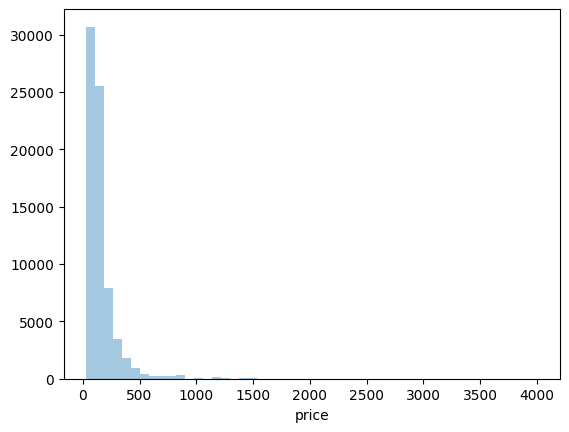

In [23]:
sns.distplot( a=df_merged_1["price"], hist=True, kde=False, rug=False )

In [24]:
result = df_merged_1.groupby(['id', 'date'])['price'].mean().reset_index()

print(result)

           id        date  price
0        5396  2022-09-10  110.0
1        5396  2022-09-11  110.0
2        5396  2022-09-12  110.0
3        5396  2022-09-13  110.0
4        5396  2022-09-14  110.0
...       ...         ...    ...
72096  788259  2023-01-27   60.0
72097  788259  2023-01-28   60.0
72098  788259  2023-01-29   60.0
72099  788259  2023-01-30   60.0
72100  788259  2023-01-31   60.0

[72101 rows x 3 columns]


In [25]:
result_1 = df_merged_1.groupby(['id'])['price'].mean().reset_index()

print(result)

           id        date  price
0        5396  2022-09-10  110.0
1        5396  2022-09-11  110.0
2        5396  2022-09-12  110.0
3        5396  2022-09-13  110.0
4        5396  2022-09-14  110.0
...       ...         ...    ...
72096  788259  2023-01-27   60.0
72097  788259  2023-01-28   60.0
72098  788259  2023-01-29   60.0
72099  788259  2023-01-30   60.0
72100  788259  2023-01-31   60.0

[72101 rows x 3 columns]


In [26]:
result_1 = df_merged_1.groupby(['date'])['price'].mean().reset_index()


In [27]:
result_1.head()

,date,price
0,2022-09-09,153.445545
1,2022-09-10,157.982
2,2022-09-11,155.676
3,2022-09-12,155.84
4,2022-09-13,155.802


In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy import stats

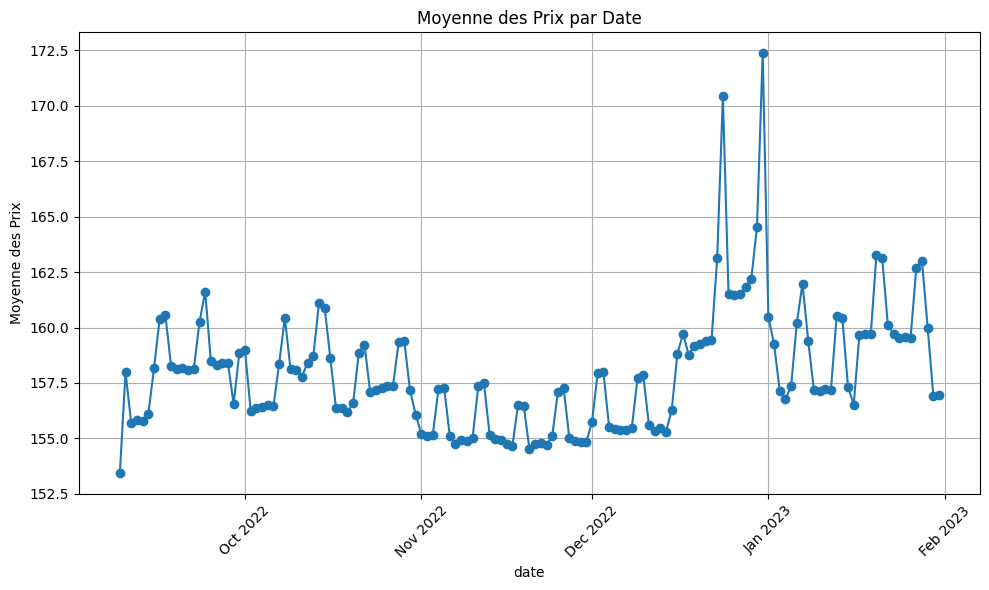

In [29]:
# Créez le graphique en ligne
plt.figure(figsize=(10, 6))  # Ajustez la taille du graphique selon vos préférences
plt.plot(result_1['date'], result_1['price'], marker='o', linestyle='-')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Afficher un marqueur par mois
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Ajoutez des labels et un titre
plt.xlabel('date')
plt.ylabel('Moyenne des Prix')
plt.title('Moyenne des Prix par Date')

# Affichez le graphique
plt.xticks(rotation=45)  # Faites pivoter les étiquettes de l'axe des x pour une meilleure lisibilité
plt.grid(True)  # Affichez une grille en arrière-plan
plt.tight_layout()  # Ajustez la mise en page du graphique

plt.show()

In [30]:
result_2 = df_merged_1.groupby(['id'])['price'].mean().reset_index()

In [34]:
result_2.head()

,id,price
0,5396,141.590278
1,7397,114.222222
2,9952,98.0
3,10586,80.0
4,10588,75.0
